In [257]:
from pathlib import Path
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [258]:
COEF_DIR = Path("coefficients")
OUTPUT_FILE = "coefficents.png"

In [260]:
# with outliers (ends in _1)
files = {match.group(1): pd.read_csv(file, usecols = range(3), names = ["variable", "value", "std"], header = 0)
         for file in COEF_DIR.iterdir()
         if (match := re.fullmatch(r"params_(.*)_1.csv", file.name))}
df = pd.concat(files)
df.index = df.index.droplevel(1)
df

# with outliers (ends in _2)
files = {match.group(1): pd.read_csv(file, usecols = range(3), names = ["variable", "value", "std"], header = 0)
         for file in COEF_DIR.iterdir()
         if (match := re.fullmatch(r"params_(.*)_2.csv", file.name))}
df2 = pd.concat(files)
df2.index = df2.index.droplevel(1)
df2

,variable,value,std
andrews,(Intercept),-22.256873,0.204927
andrews,prcp,8.597507,0.157814
andrews,snow,12.284195,0.104334
andrews,awnd,0.157982,0.010469
andrews,tmax,0.081801,0.001788
andrews,distance,-0.000345,0.000067
andrews,crs_dep_time_base10,0.686790,0.007363
huber,(Intercept),-22.256873,0.204927
huber,prcp,8.597507,0.157814
huber,snow,12.284195,0.104334


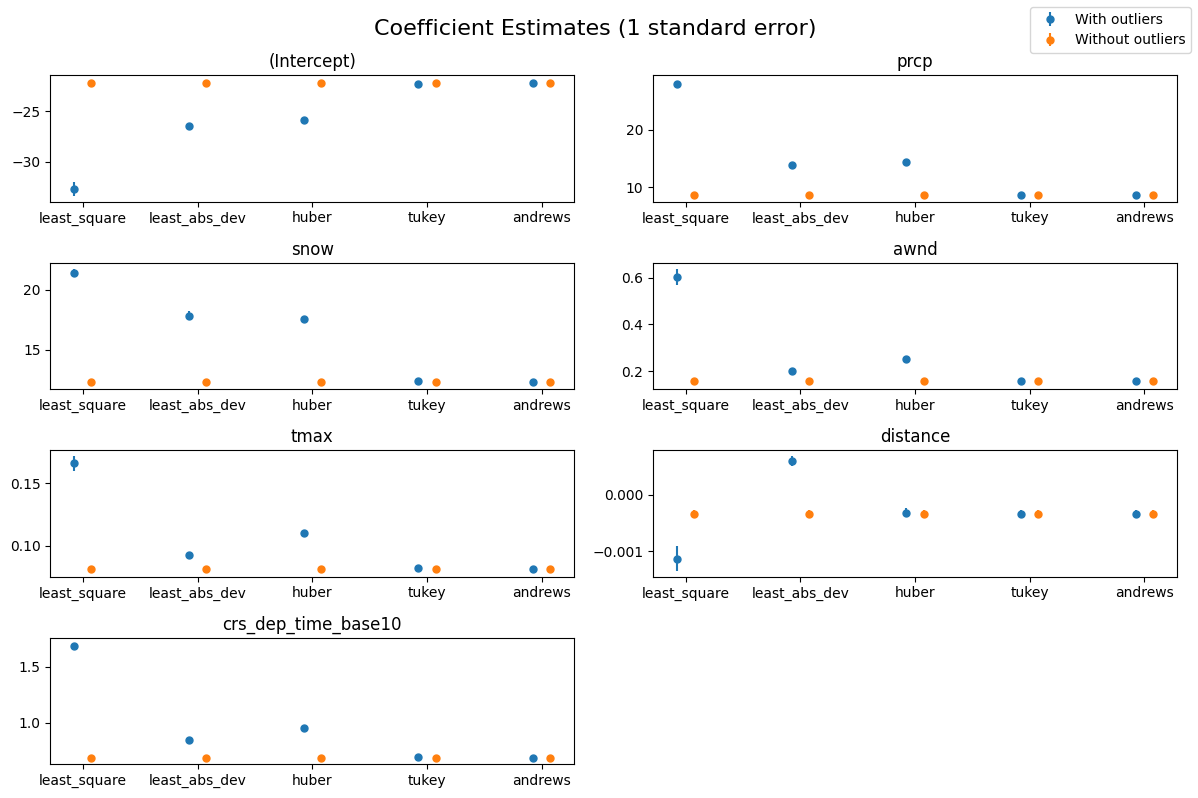

In [266]:
M_ORDER = ["least_square", "least_abs_dev", "huber", "tukey", "andrews"]

fig, axs = plt.subplots(4, 2, figsize = (12, 8))

for i, variable in enumerate(df.variable.unique()):
    ax = axs[i // 2, i % 2]
    df_variable = df[df.variable == variable].reindex(M_ORDER)
    df_variable2 = df2[df2.variable == variable].reindex(M_ORDER)

    xpos = np.arange(len(df_variable))
    offset = 0.075

    ax.errorbar(x = xpos - offset, y = df_variable.value, yerr = df_variable["std"], linestyle = "", fmt = "o", ms = 5)
    ax.errorbar(x = xpos + offset, y = df_variable2.value, yerr = df_variable2["std"], linestyle = "", fmt = "o", ms = 5)
    ax.set_xticks(xpos, M_ORDER)
    ax.set_title(variable)
axs[3, 1].axis("off")

plt.figlegend(["With outliers", "Without outliers"])
plt.suptitle("Coefficient Estimates (1 standard error)", fontsize = 16)

plt.tight_layout()
plt.savefig(OUTPUT_FILE, dpi = 200)
plt.show()